In [12]:
import torch
from torch.utils.data import DataLoader, random_split
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np 
import torchvision
from torchvision import datasets, transforms
from torchvision.datasets import ImageFolder
import random

In [2]:
print(torch.backends.mps.is_available())

True


In [ ]:
# load the dataset
dataset = datasets.ImageFolder(root="../Driver Drowsiness Dataset (DDD)")

# print the class labels
print(dataset.classes)

['Drowsy', 'Non Drowsy']


In [5]:
# dataset shape

print(len(dataset))

41793


In [8]:
# number of images in each class

class_counts = {}

for _, label in dataset.samples:
    if label not in class_counts:
        class_counts[label] = 0
    class_counts[label] += 1

print(f'Drowsy: {class_counts[0]}')
print(f'Not Drowsy: {class_counts[1]}')

Drowsy: 22348
Not Drowsy: 19445


In [43]:
random.seed(43)

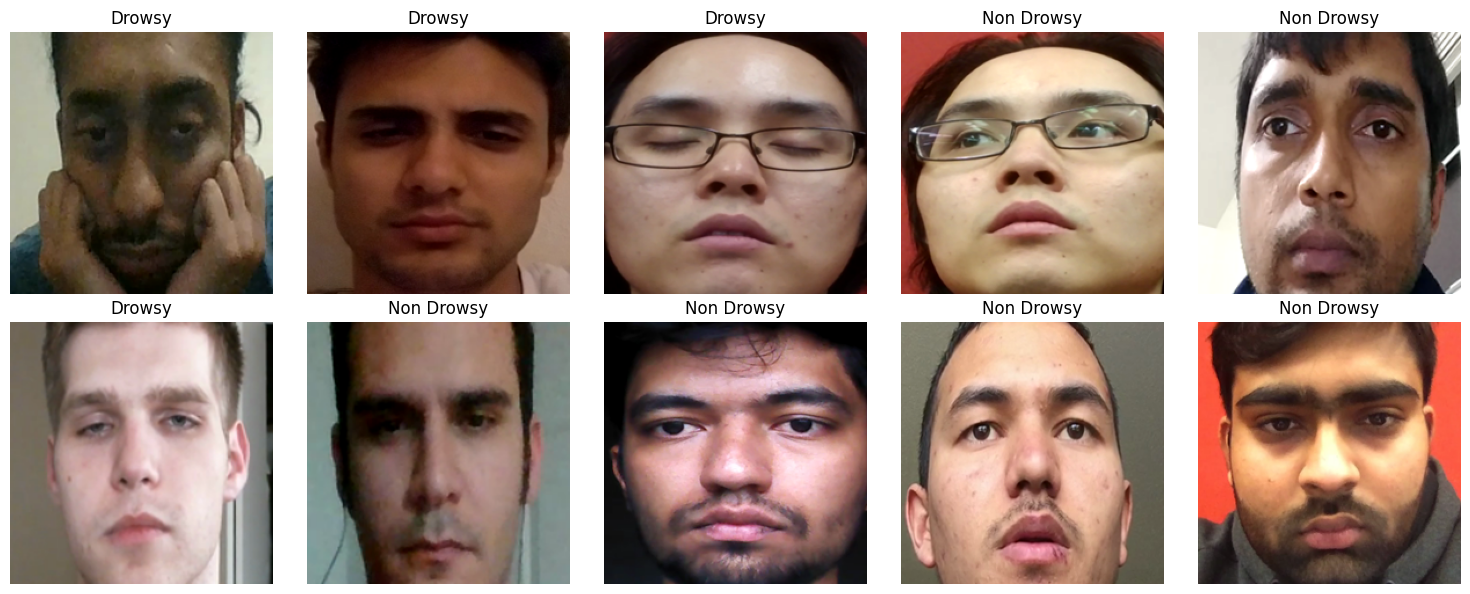

In [44]:
# print 10 random samples from the dataset
random_samples = random.sample(dataset.samples, 10)

fig, axs = plt.subplots(2, 5, figsize=(15, 6))

for i, (image_path, label) in enumerate(random_samples):
    image = Image.open(image_path)
    ax = axs[i // 5, i % 5] 
    ax.imshow(image)
    ax.axis('off')
    ax.set_title(dataset.classes[label])

plt.tight_layout()
plt.show()

## Transform Images

### Resize

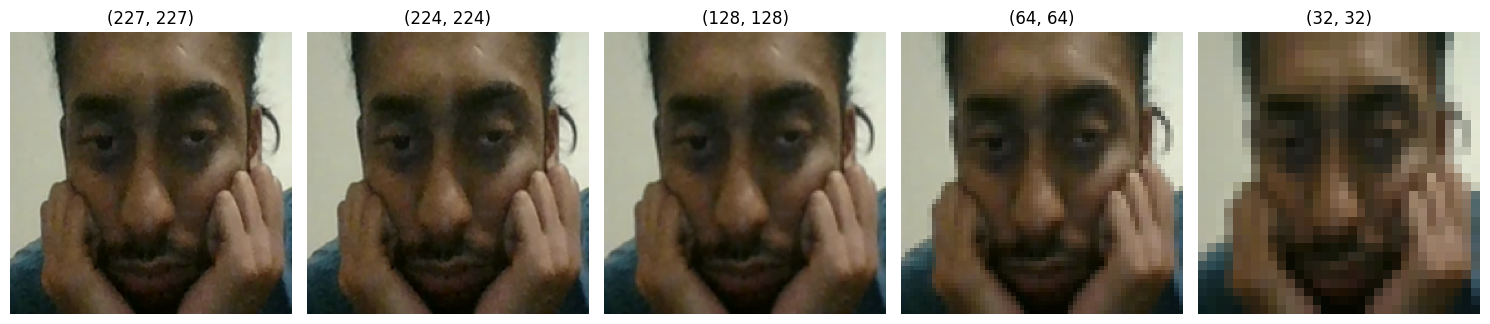

In [ ]:
image = Image.open(random_samples[0][0])

# resize the image to different sizes
image_original = image
image_224 = image.resize((224, 224))
image_128 = image.resize((128, 128))
image_64 = image.resize((64, 64))
image_32 = image.resize((32, 32))

# show images
images = [image_original, image_224, image_128, image_64, image_32]

fig, axs = plt.subplots(1, 5, figsize=(15, 5))

for i, img in enumerate(images):
    axs[i].imshow(img)
    axs[i].axis('off')
    axs[i].set_title(img.size)

plt.tight_layout()
plt.show()

### Graycale

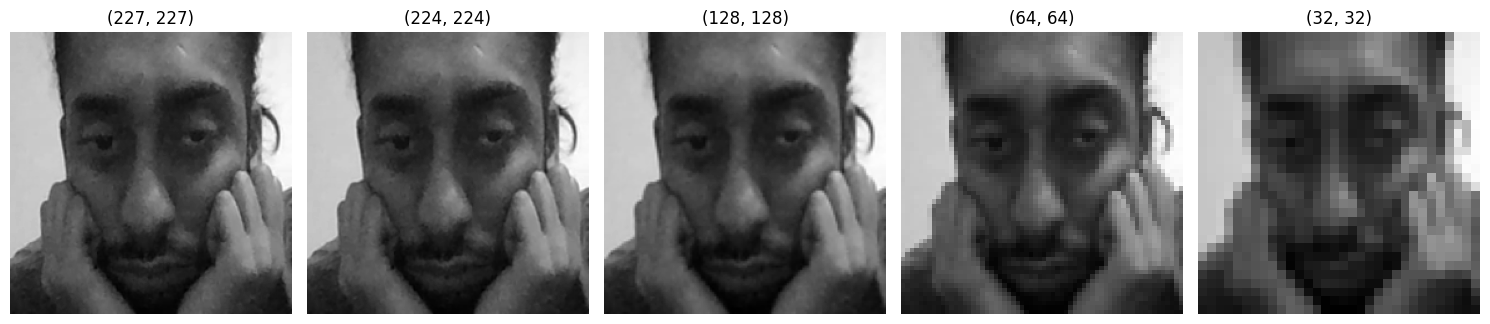

In [ ]:
# convert the image to grayscale
grayscale_transform = transforms.Grayscale(num_output_channels=1)

# resize the grayscale image to different sizes
image_gray_original = grayscale_transform(image_original)
image_gray_224 = grayscale_transform(image_224)
image_gray_128 = grayscale_transform(image_128)
image_gray_64 = grayscale_transform(image_64)
image_gray_32 = grayscale_transform(image_32)

# show images
images_gray = [image_gray_original, image_gray_224, image_gray_128, image_gray_64, image_gray_32]
fig, axs = plt.subplots(1, 5, figsize=(15, 5))
for i, img in enumerate(images_gray):
    axs[i].imshow(img, cmap='gray')
    axs[i].axis('off')
    axs[i].set_title(img.size)

plt.tight_layout()
plt.show()

### define transformation pipeline

In [51]:
# transform pipeline

transform = transforms.Compose([
    transforms.Grayscale(num_output_channels = 1),
    transforms.Resize((128, 128)),
    transforms.ToTensor(), 
])

In [ ]:
# transform the dataset

dataset = datasets.ImageFolder(root="../Driver Drowsiness Dataset (DDD)", transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

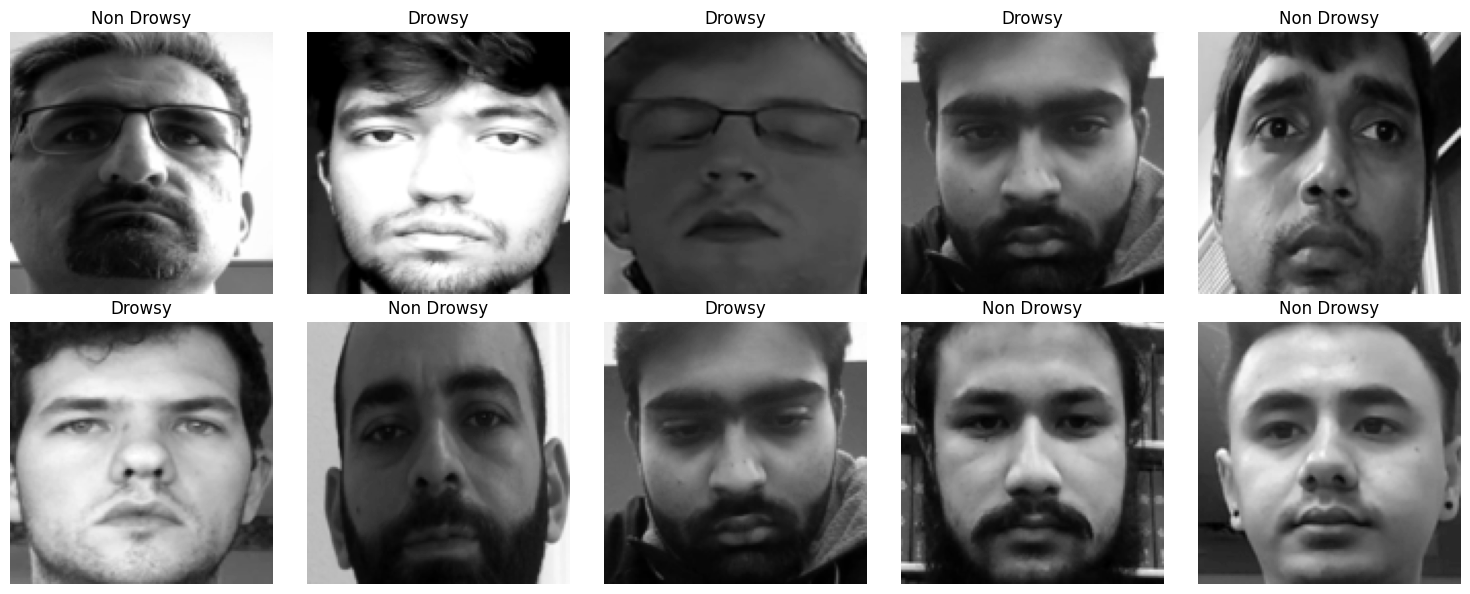

In [57]:
# show the first 10 images
images, labels = next(iter(dataloader))

fig, axs = plt.subplots(2, 5, figsize=(15, 6))
for i in range(10):
    ax = axs[i // 5, i % 5] 
    ax.imshow(images[i][0], cmap='gray')
    ax.axis('off')
    ax.set_title(dataset.classes[labels[i]])
    
plt.tight_layout()
plt.show()